## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_19-25-05-23.csv', firstRow=498, lastRow=504)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_220523_S499-504.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=502s; mass=45.803549999999994g
This equals a volume of 45.895m; expected was 46.139mL; error is 0.529%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0010000000000000002 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


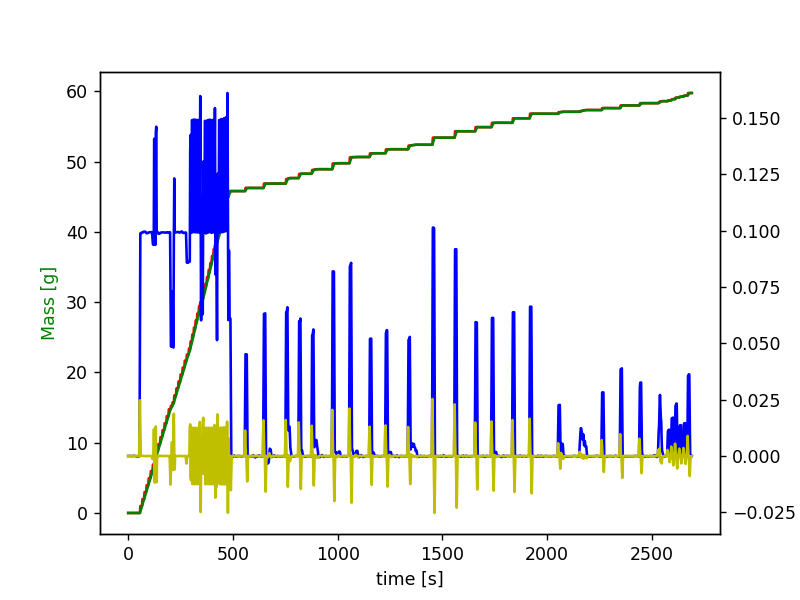

Addition of 0.45g Texapon SB 3 KC detected from 554s to 574s - expected volume = 0.84mL and actual volume = 0.405mL (resulting error is 51.809%)
Addition of 0.628g Texapon SB 3 KC detected from 642s to 688s - expected volume = 0.749mL and actual volume = 0.565mL (resulting error is 24.507%)
Addition of 0.787g Plantapon LC 7 detected from 748s to 784s - expected volume = 0.939mL and actual volume = 0.74mL (resulting error is 21.221%)
Addition of 0.623g Plantapon LC 7 detected from 810s to 838s - expected volume = 0.501mL and actual volume = 0.582mL (resulting error is 16.03%)
Addition of 0.645g Plantapon LC 7 detected from 872s to 912s - expected volume = 0.501mL and actual volume = 0.603mL (resulting error is 20.298%)
Addition of 0.852g Dehyton MC detected from 970s to 1018s - expected volume = 0.827mL and actual volume = 0.786mL (resulting error is 4.961%)
Addition of 0.891g Dehyton MC detected from 1052s to 1102s - expected volume = 0.77mL and actual volume = 0.825mL (resulting error

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.000390625 g/s^2


<IPython.core.display.Javascript object>


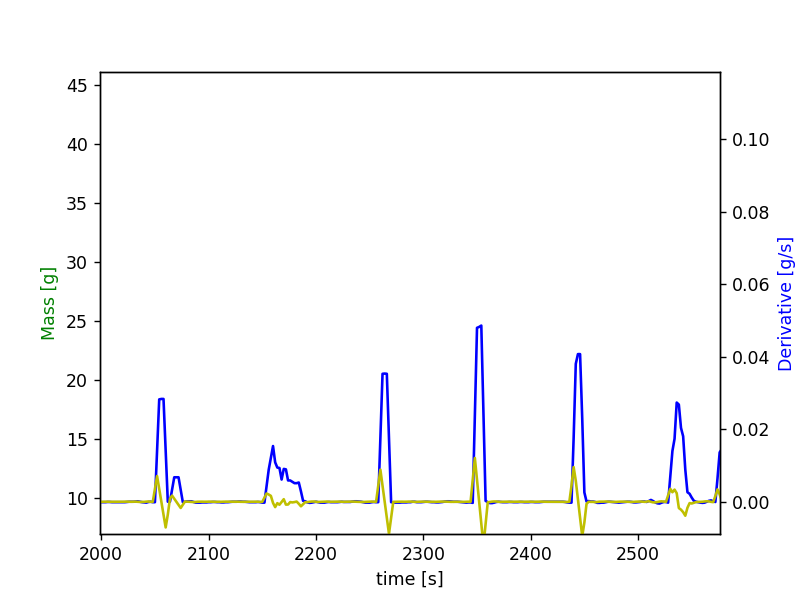

Addition of 0.28g Dehyquart CC6 detected from 2048s to 2080s - expected volume = 0.272mL and actual volume = 0.265mL (resulting error is 2.526%)
Addition of 0.259g Dehyquart CC6 detected from 2150s to 2192s - expected volume = 0.128mL and actual volume = 0.247mL (resulting error is 92.13%)
Addition of 0.281g Dehyquart CC6 detected from 2256s to 2274s - expected volume = 0.135mL and actual volume = 0.265mL (resulting error is 96.154%)
Addition of 0.385g Dehyquart CC6 detected from 2344s to 2362s - expected volume = 0.252mL and actual volume = 0.36mL (resulting error is 42.983%)
Addition of 0.325g Dehyquart CC6 detected from 2436s to 2456s - expected volume = 0.269mL and actual volume = 0.309mL (resulting error is 14.708%)
Addition of 0.291g Dehyquart CC6 detected from 2526s to 2554s - expected volume = 0.176mL and actual volume = 0.274mL (resulting error is 55.682%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


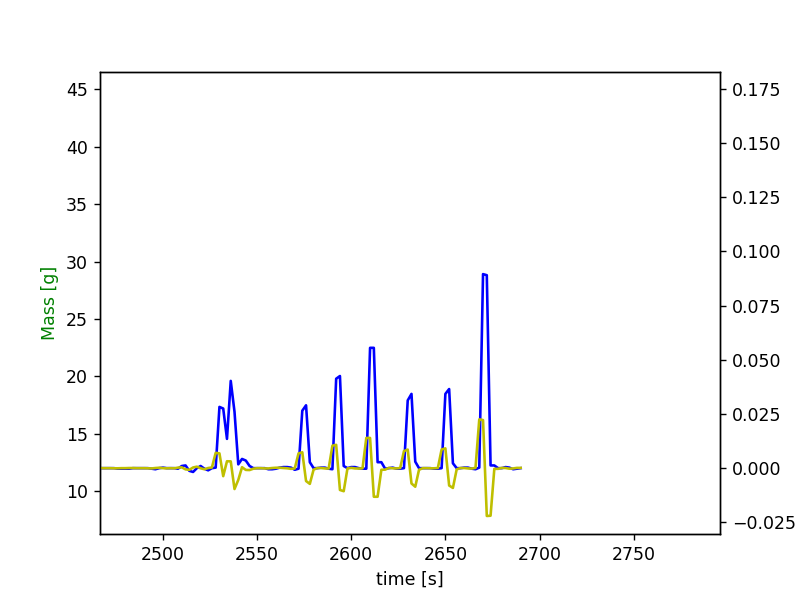

Addition of 0.115g Arlypon F detected from 2570s to 2582s - expected volume = 0.127mL and actual volume = 0.131mL (resulting error is 3.604%)
Addition of 0.169g Arlypon F detected from 2588s to 2600s - expected volume = 0.178mL and actual volume = 0.194mL (resulting error is 8.654%)
Addition of 0.232g Arlypon F detected from 2606s to 2618s - expected volume = 0.244mL and actual volume = 0.263mL (resulting error is 7.674%)
Addition of 0.136g Arlypon F detected from 2626s to 2638s - expected volume = 0.134mL and actual volume = 0.153mL (resulting error is 14.286%)
Addition of 0.145g Arlypon F detected from 2646s to 2658s - expected volume = 0.152mL and actual volume = 0.166mL (resulting error is 9.023%)
Addition of 0.361g Arlypon F detected from 2666s to 2678s - expected volume = 0.394mL and actual volume = 0.409mL (resulting error is 3.736%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2780,2834,2844,2848,2862,2884,2906])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_220523_S499-S504.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_2116\2116637770.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
498,499.0,0.000000,0.0,0.000000,0.0,0.0,8.469750,0.000000,0.000000,0.000000,9.119511,0.000000,0.000000,0.0,2.779370,0.0,0.0,1.142547,0.0
499,500.0,4.697069,0.0,0.000000,0.0,0.0,0.000000,0.000000,6.764364,0.000000,0.000000,0.000000,0.000000,0.0,2.706737,0.0,0.0,1.768836,0.0
500,501.0,0.000000,0.0,7.850986,0.0,0.0,0.000000,0.000000,0.000000,10.093555,0.000000,0.000000,0.000000,0.0,2.798223,0.0,0.0,2.309407,0.0
501,502.0,0.000000,0.0,12.239760,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.548674,0.0,3.713004,0.0,0.0,1.312885,0.0
502,503.0,6.241120,0.0,0.000000,0.0,0.0,8.852434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.225639,0.0,0.0,1.440793,0.0
503,504.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.870708,0.000000,0.000000,0.000000,11.972781,0.000000,0.0,2.854456,0.0,0.0,3.539574,0.0
